In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("shaping times 2/1usshapingtime_dig2-192.168.0.254_CH0.txt", skiprows=4, max_rows=1)
print(data)

[1.61746  1.40383  1.5259   ... 0.366217 0.427253 0.671397]


In [122]:
peaks = []
for num in range(1, 4790):
    if num % 5 == 0:
        data = np.loadtxt("shaping times/4us_dig2-192.168.0.254_CH0.txt", skiprows=num-1, max_rows=1)
        peak = max(data)
        peaks.append(peak)
    else:
        pass
peaks = np.array(peaks)
print(len(peaks))


957


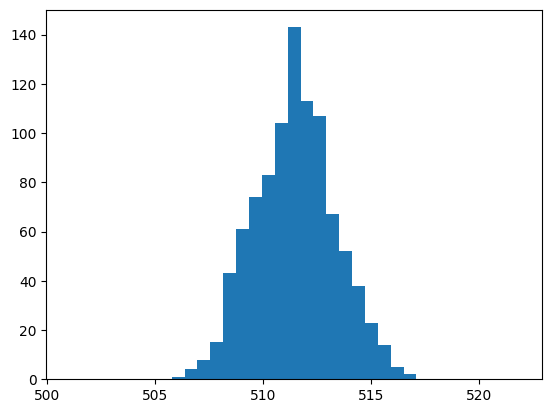

In [126]:
bin_array = np.linspace(min(peaks)-5, max(peaks)+5, 3)
n, b, p = plt.hist(peaks, bins=bin_array)

In [117]:
from scipy.optimize import curve_fit
def Gauss(x, A, mean, std):
  gauss = A*np.exp(-(x-mean)**2/(2*std**2))
  return gauss

In [120]:
popt, pcov = curve_fit(Gauss, bin_array[0:len(n)], n, p0=[185, 511, 10])
print(popt)

[164.32510424 510.70446523   1.81649431]


Amplitude = 164.325104, mean = 510.704465, stdev = 1.816494


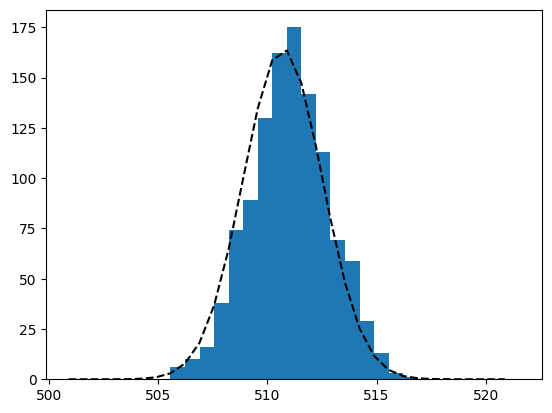

In [121]:
plt.plot(bin_array[0:len(n)], Gauss(bin_array[0:len(n)], *popt), "--", color="black", label="")
n, b, p = plt.hist(peaks, bins=bin_array)
print("Amplitude = %f, mean = %f, stdev = %f" % (popt[0], popt[1], popt[2]))


In [69]:
FWHM_mvolts_array = [3.36, 2.08, 1.81, ]
shape_times = [0.25, 1, 1.5, ]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
